![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

## **ETL Y EDA**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




In [922]:
# Carga de librerias necesarias para el proceso de ETL
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

## Extracción de los datos

- Se extrae la data desde el archivo entregado, creamos un DataFrame para procesarlo y poder ver la estructura del mismo

In [923]:
df_main = pd.read_excel('datasets/BBDD_Hospitalización.xlsx')
df_main

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [924]:
# Eliminar espacios en blanco en los datos del dataframe, para evitar posibles errores de digitación.
def eliminar_espacios(valor):
    if isinstance(valor,str):
        return valor.strip()
    return valor

df_main = df_main.applymap(eliminar_espacios)

In [925]:
# Filtramos y eliminamos filas duplicadas
df_main[df_main.duplicated(keep=False)]
df_main = df_main.drop_duplicates(subset=df_main.columns, keep='first')
df_main = df_main.reset_index(drop=True)

In [926]:
# Hemos pasado de un DataFrame de 570 filas a 461 luego de eliminar filas duplicadas.
df_main

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
457,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
458,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
459,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [927]:
# Verificación tipo de dato en cada columna del DF
def verificar_datos(df):
    verif = {"nombre_campo": [], "tipo_dato": [], "%_No_Nulos": [], "%_Nulos": [], "Nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        verif["nombre_campo"].append(columna)
        verif["tipo_dato"].append(df[columna].dtypes)
        verif["%_No_Nulos"].append(round(porcentaje_no_nulos, 2))
        verif["%_Nulos"].append(round(100 - porcentaje_no_nulos, 2))
        verif["Nulos"].append(df[columna].isnull().sum())

    df_info = pd.DataFrame(verif)
        
    return df_info

verificar_datos(df_main)

,nombre_campo,tipo_dato,%_No_Nulos,%_Nulos,Nulos
0,EDAD,float64,99.78,0.22,1
1,DIABETES,object,99.78,0.22,1
2,HOSPITALIZACIÓN ULTIMO MES,object,99.78,0.22,1
3,PSA,float64,98.92,1.08,5
4,BIOPSIAS PREVIAS,object,99.35,0.65,3
5,VOLUMEN PROSTATICO,object,99.57,0.43,2
6,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,object,99.78,0.22,1
7,NUMERO DE MUESTRAS TOMADAS,float64,99.78,0.22,1
8,CUP,object,99.57,0.43,2
9,ENF. CRONICA PULMONAR OBSTRUCTIVA,object,99.35,0.65,3


In [928]:
# Renombrando los encabezados
df_main.rename(columns={
    'EDAD': 'edad',
    'DIABETES': 'diabetes',
    'HOSPITALIZACIÓN ULTIMO MES': 'hosp_ult_mes',
    'PSA': 'psa',
    'BIOPSIAS PREVIAS': 'biop_prev',
    'VOLUMEN PROSTATICO': 'vol_prostatico',
    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'antib_en_profilaxis',
    'NUMERO DE MUESTRAS TOMADAS': 'n_muestras',
    'CUP': 'cup',
    'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'e_cpo',
    'BIOPSIA': 'biopsia',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'n_dias_con_infecc',
    'FIEBRE': 'fiebre',
    'ITU': 'itu',
    'TIPO DE CULTIVO': 'tipo_cultivo',
    'AGENTE AISLADO': 'agente_aislado',
    'PATRON DE RESISTENCIA': 'patron_resistencia',
    'HOSPITALIZACION': 'hospitalizacion',
    'DIAS HOSPITALIZACION MQ': 'dias_hosp_mq',
    'DIAS HOSPITALIZACIÓN UPC': 'dias_hosp_upc'
}, inplace=True)

In [929]:
# Convertimos la columna 'edad' de float a dato integer
df_main['edad'] = df_main['edad'].replace('<NA>', pd.NA)
df_main['edad'] = df_main['edad'].astype('Int64')

In [930]:
# Convertimos las columnas 'edad', 'n_muestras', 'dias_hosp_mq', 'dias_hosp_upc' a dato tipo entero.
df_main['edad'] = df_main['edad'].astype('Int64')
df_main['n_muestras'] = df_main['n_muestras'].astype('Int64')
df_main['dias_hosp_mq'] = df_main['dias_hosp_mq'].astype('Int64')
df_main['dias_hosp_upc'] = df_main['dias_hosp_upc'].astype('Int64')

In [931]:
verificar_datos(df_main)

,nombre_campo,tipo_dato,%_No_Nulos,%_Nulos,Nulos
0,edad,Int64,99.78,0.22,1
1,diabetes,object,99.78,0.22,1
2,hosp_ult_mes,object,99.78,0.22,1
3,psa,float64,98.92,1.08,5
4,biop_prev,object,99.35,0.65,3
5,vol_prostatico,object,99.57,0.43,2
6,antib_en_profilaxis,object,99.78,0.22,1
7,n_muestras,Int64,99.78,0.22,1
8,cup,object,99.57,0.43,2
9,e_cpo,object,99.35,0.65,3


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [932]:
# Eliminamos la variable columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA' (e_cpo), porque no tiene relacion directa con la enfermedad diabetes.
df_main = df_main.drop('e_cpo', axis=1)

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [933]:
df_main.describe()

,edad,psa,n_muestras,dias_hosp_mq,dias_hosp_upc
count,460.0,456.000000,460.0,460.0,460.0
mean,64.213043,14.065921,12.923913,0.204348,0.017391
std,9.817853,17.043606,3.970572,1.061088,0.218236
min,39.0,0.600000,4.0,0.0,0.0
25%,59.0,5.700000,12.0,0.0,0.0
50%,64.0,8.000000,12.0,0.0,0.0
75%,69.0,15.887500,12.0,0.0,0.0
max,151.0,100.000000,24.0,12.0,3.0


In [934]:
def visualizar_outliers_plotly(df, columna):
    fig = px.box(df, y=columna, title=f'Boxplot de {columna}')
    fig.show()
visualizar_outliers_plotly(df_main, 'edad')
visualizar_outliers_plotly(df_main, 'psa')
visualizar_outliers_plotly(df_main, 'n_muestras')
visualizar_outliers_plotly(df_main, 'dias_hosp_mq')
visualizar_outliers_plotly(df_main, 'dias_hosp_upc')

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [935]:
# Eliminaremos los filas que contengan datos fuera del upper fence, para la columna 'edad' y 'psa', porque no tenemos como corroborar
# la integridad de estos datos atípicos.
df_main = df_main[df_main['edad'] < 84]
df_main = df_main[df_main['psa'] < 31]

In [936]:
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0,0
456,64,NO,NO,4.80,NO,SI,OTROS,12,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0
457,69,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
458,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0,0


Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

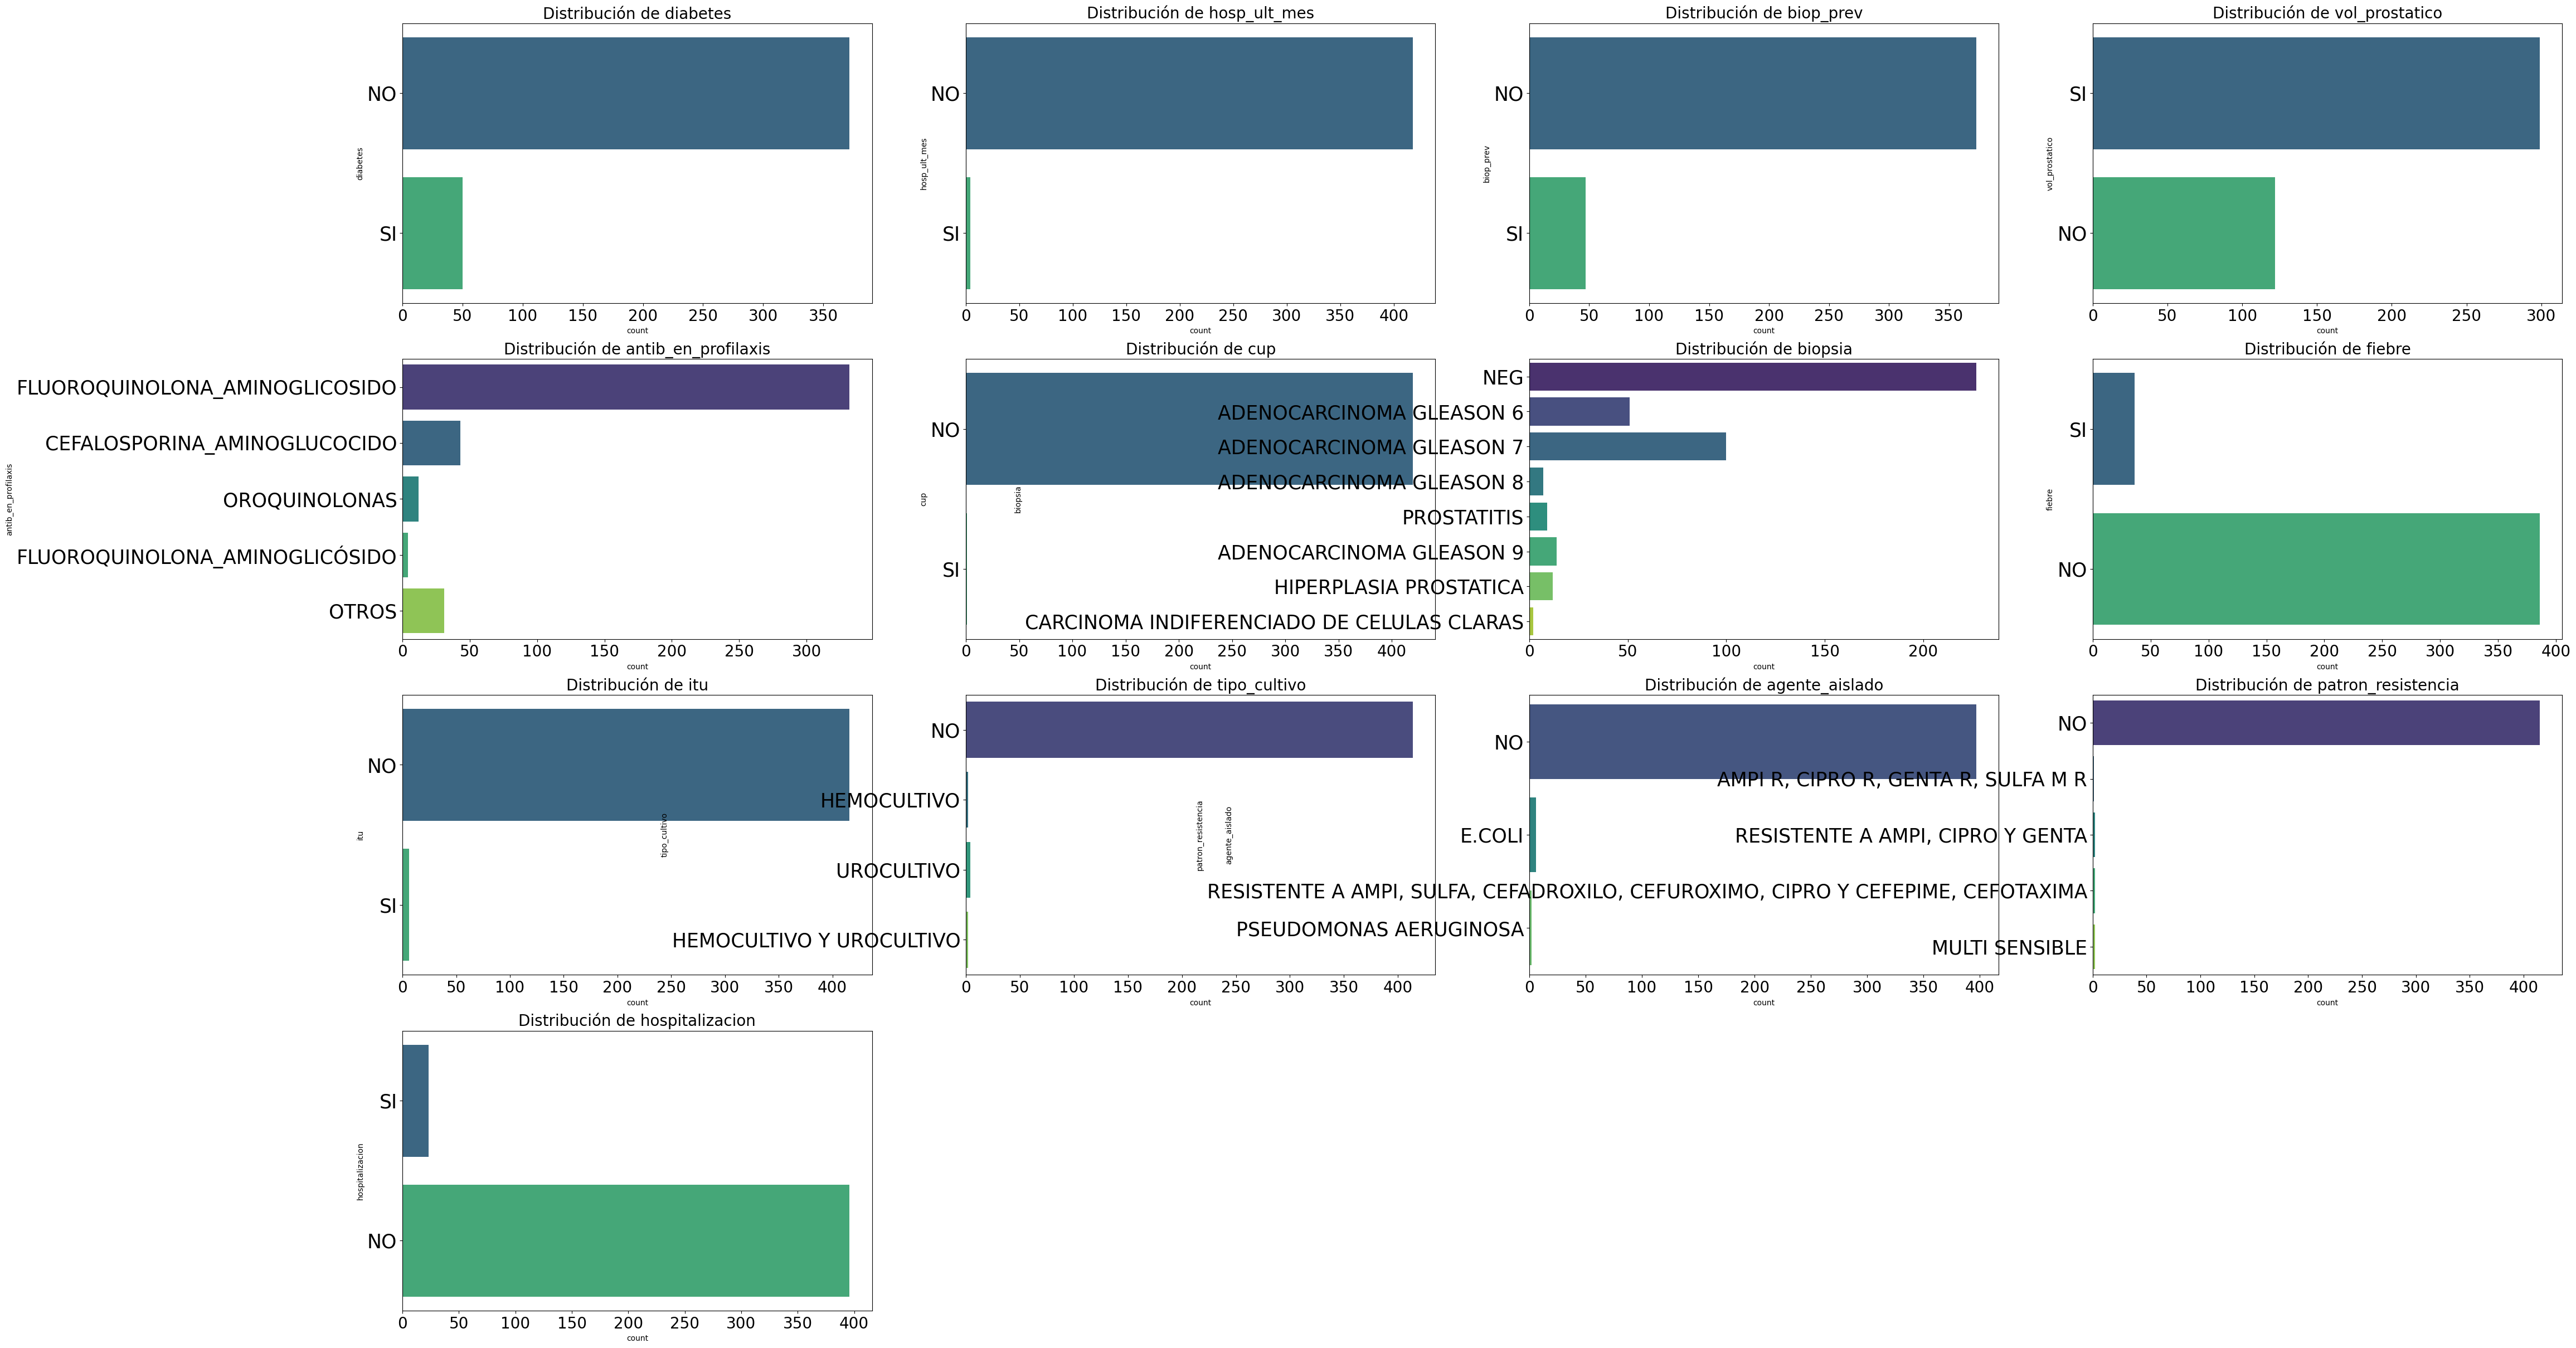

In [937]:
# Lista de variables categóricas
variables_categoricas = ['diabetes', 'hosp_ult_mes', 'biop_prev', 'vol_prostatico', 'antib_en_profilaxis', 'cup',
                         'biopsia', 'fiebre', 'itu', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia', 'hospitalizacion']

# Establecer el tamaño de la figura
plt.figure(figsize=(50, 30))

# Iterar sobre las variables categóricas y crear subgráficos
for i, variable in enumerate(variables_categoricas, 1):
    plt.subplot(4, 4, i)  # Ajustar según sea necesario
    sns.countplot(y=variable, data=df_main, palette='viridis')  # Cambiado x por y
    plt.title(f'Distribución de {variable}', fontsize=20)
    # Ajustar el tamaño de las etiquetas del eje y
    plt.tick_params(axis='y', labelsize=25)  # Puedes ajustar el tamaño según sea necesario
    
    # Ajustar el tamaño de las etiquetas del eje x
    plt.tick_params(axis='x', labelsize=20)  # Puedes ajustar el tamaño según sea necesario
    
plt.tight_layout(pad=1)
plt.show()


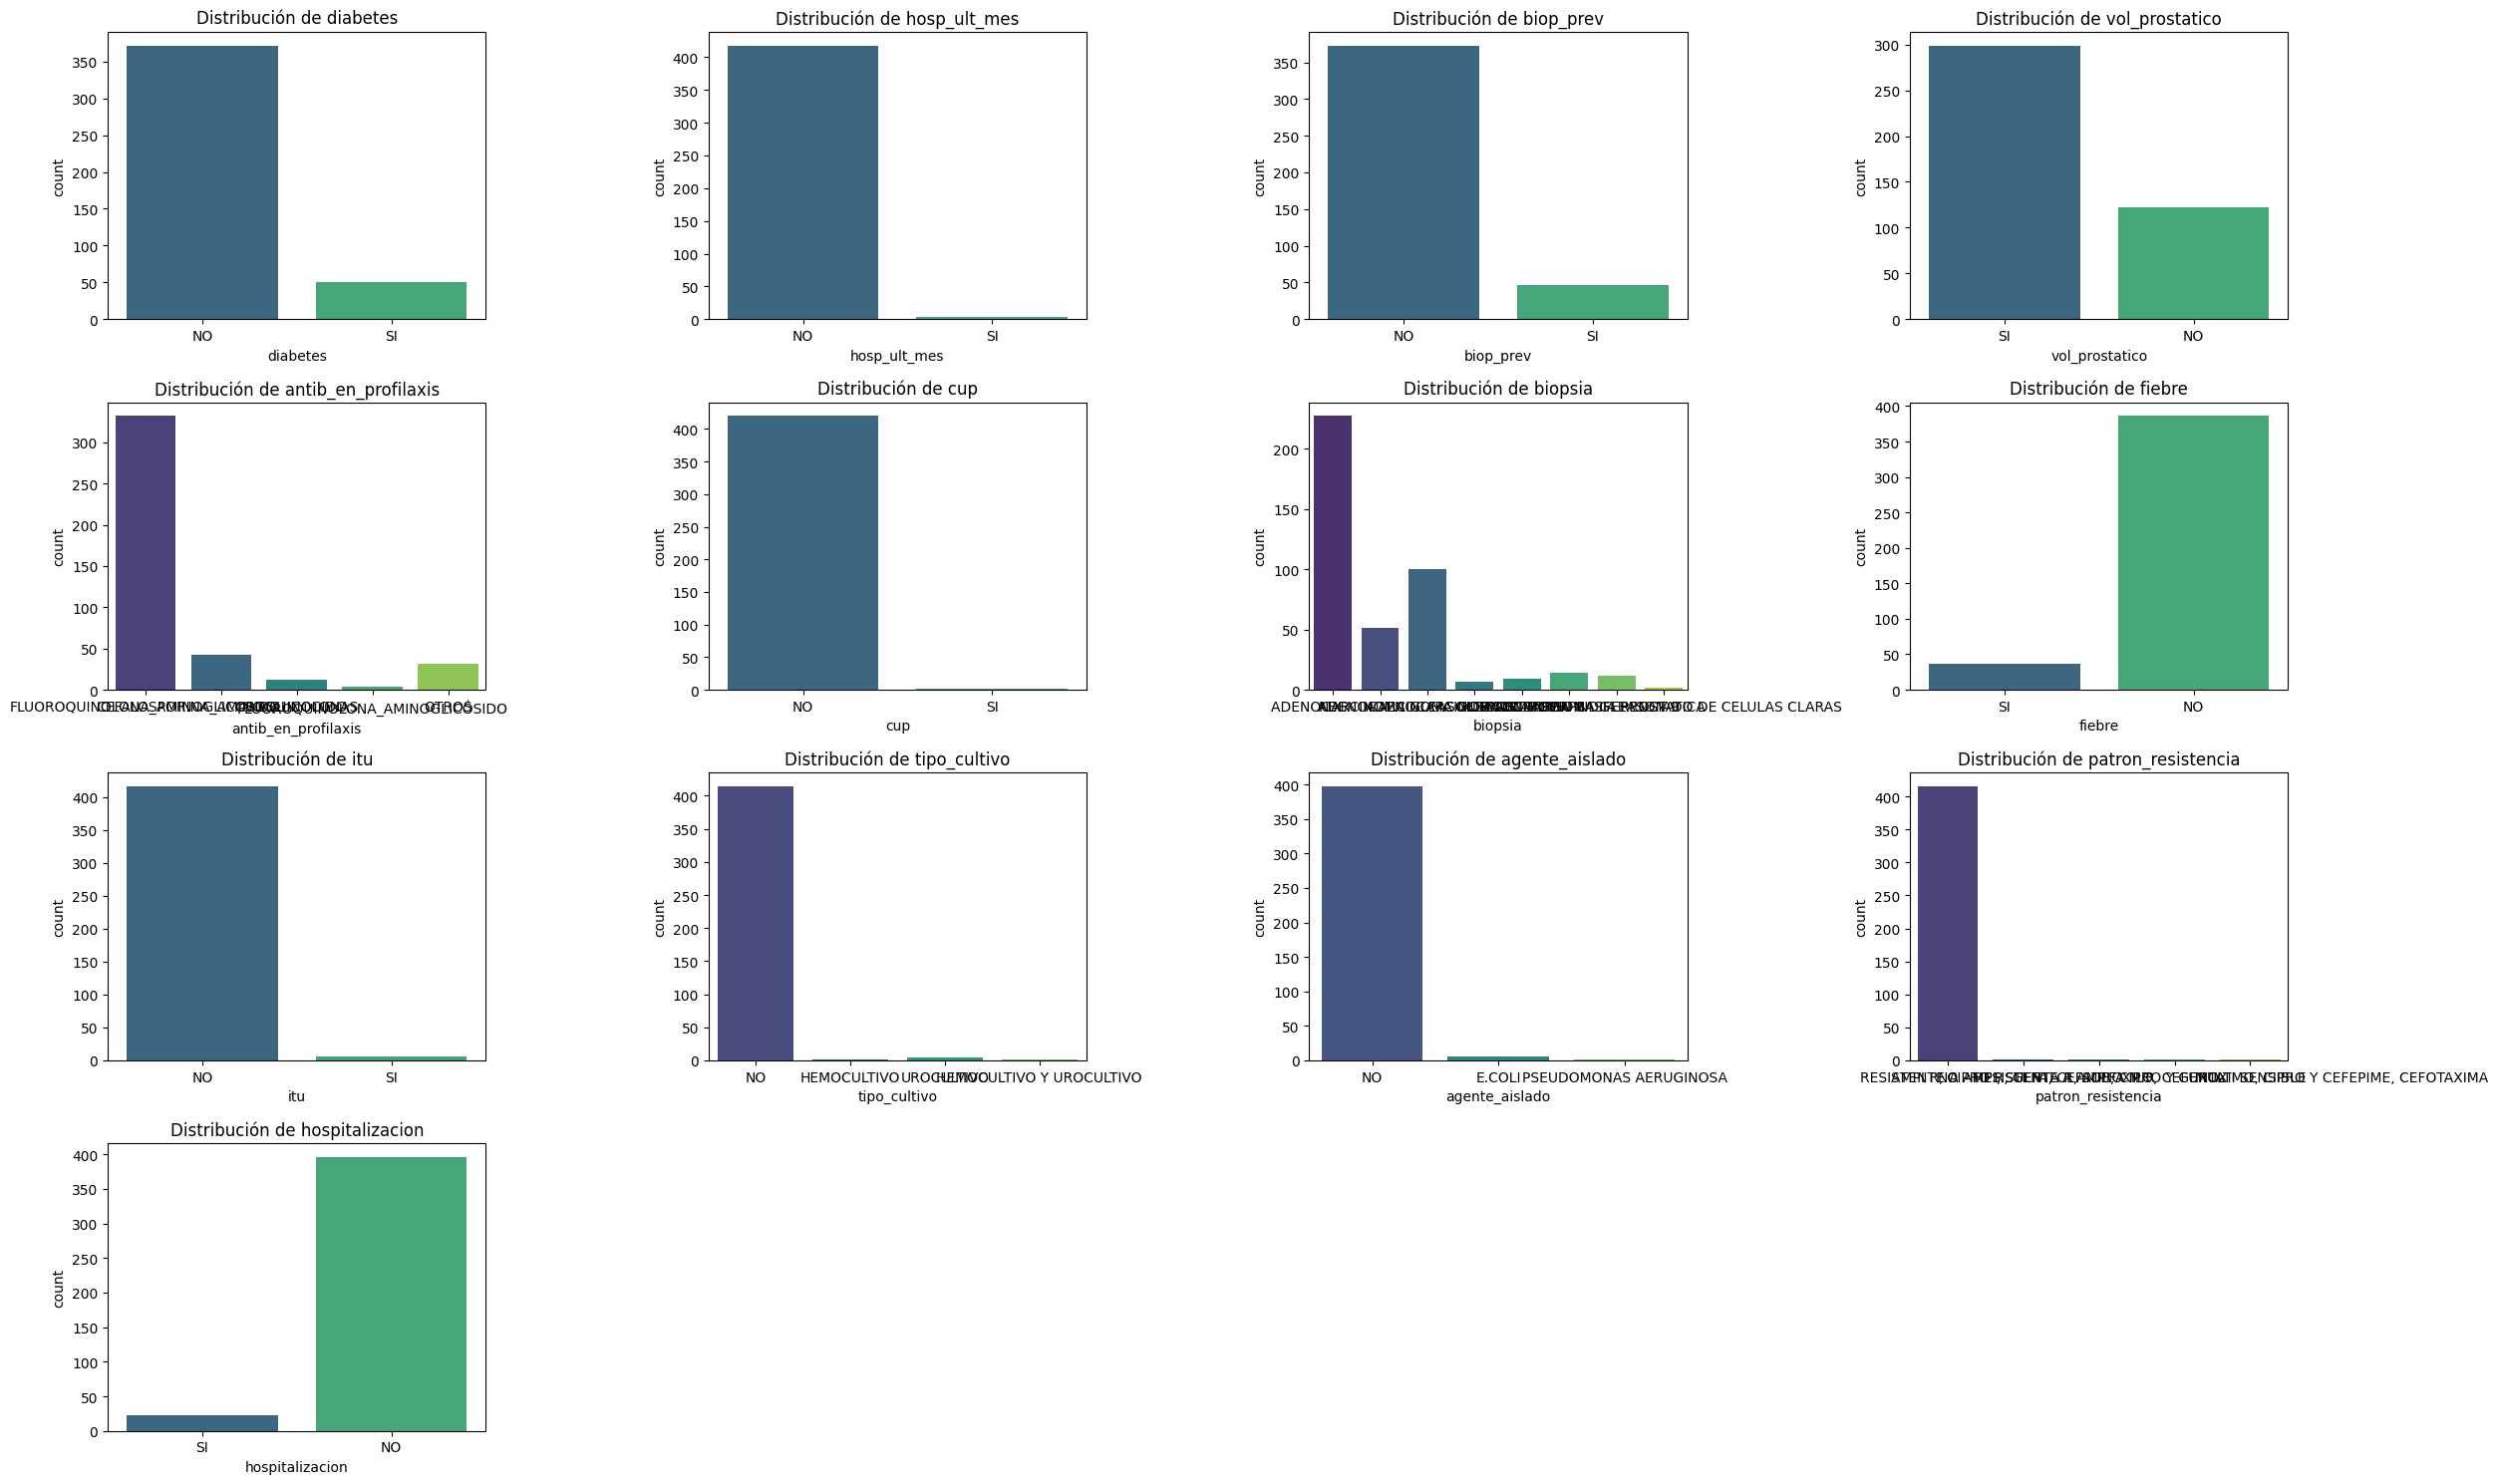

In [938]:
# Lista de variables categóricas
variables_categoricas = ['diabetes', 'hosp_ult_mes', 'biop_prev', 'vol_prostatico', 'antib_en_profilaxis', 'cup',
                         'biopsia', 'fiebre', 'itu', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia', 'hospitalizacion']

# Establecer el tamaño de la figura
plt.figure(figsize=(25, 15))

# Iterar sobre las variables categóricas y crear subgráficos
for i, variable in enumerate(variables_categoricas, 1):
    plt.subplot(4, 4, i)  # Ajustar según sea necesario
    sns.countplot(x=variable, data=df_main, palette='viridis')
    plt.title(f'Distribución de {variable}')

plt.tight_layout()
plt.show()

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [939]:
df_main.isnull().sum()

edad                    0
diabetes                0
hosp_ult_mes            0
psa                     0
biop_prev               2
vol_prostatico          1
antib_en_profilaxis     0
n_muestras              0
cup                     1
biopsia                 0
n_dias_con_infecc       0
fiebre                  0
itu                     0
tipo_cultivo            0
agente_aislado         17
patron_resistencia      0
hospitalizacion         3
dias_hosp_mq            0
dias_hosp_upc           0
dtype: int64

In [940]:
# Borramos los registros nulos, porque:
# Un conjunto de datos más limpio facilita la aplicación de análisis estadísticos y modelos predictivos. La presencia de
# valores nulos puede complicar estos procesos, y su eliminación simplifica la realización de análisis descriptivos y predictivos.
df_main = df_main.dropna()

In [941]:
verificar_datos(df_main)

,nombre_campo,tipo_dato,%_No_Nulos,%_Nulos,Nulos
0,edad,Int64,100.0,0.0,0
1,diabetes,object,100.0,0.0,0
2,hosp_ult_mes,object,100.0,0.0,0
3,psa,float64,100.0,0.0,0
4,biop_prev,object,100.0,0.0,0
5,vol_prostatico,object,100.0,0.0,0
6,antib_en_profilaxis,object,100.0,0.0,0
7,n_muestras,Int64,100.0,0.0,0
8,cup,object,100.0,0.0,0
9,biopsia,object,100.0,0.0,0


Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [942]:
# Mostrar datos unicos de nuestro DF, por columna en una tabla
## Se deja como esta, porque estos datos estan listos para poder seguir trabajandolos
def valores_unicos_columnas_type_int_bool(df):
    tabla_datos = {"Columna": [], "Valores Únicos": []}

    for columna in df.columns:
        if pd.api.types.is_integer_dtype(df[columna]) or pd.api.types.is_float_dtype(df[columna]):
            valores_unicos = df[columna].unique().tolist()
            tabla_datos["Columna"].append(columna)
            tabla_datos["Valores Únicos"].append(valores_unicos)

    df_tabla = pd.DataFrame(tabla_datos)
    return df_tabla

valores_unicos_columnas_type_int_bool(df_main)

,Columna,Valores Únicos
0,edad,"[53, 56, 57, 55, 67, 69, 54, 68, 43, 65, 62, 7..."
1,psa,"[4.0, 7.7, 29.0, 7.0, 6.2, 6.0, 5.7, 4.3, 5.19..."
2,n_muestras,"[12, 24, 18, 16, 6, 10, 4, 8, 15, 22, 14, 20]"
3,dias_hosp_mq,"[2, 5, 4, 3, 12, 0]"
4,dias_hosp_upc,"[0, 3, 2]"


Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [943]:
# Revisamos la integridad de los datos para las variables categóricas nominales
def valores_unicos_columnas_type_object(df):
    tabla_datos = {"Columna": [], "Valores Únicos": []}

    for columna in df.columns:
        if pd.api.types.is_object_dtype(df[columna]):
            valores_unicos = df[columna].unique().tolist()
            tabla_datos["Columna"].append(columna)
            tabla_datos["Valores Únicos"].append(valores_unicos)

    df_tabla = pd.DataFrame(tabla_datos)
    return df_tabla

valores_unicos_columnas_type_object(df_main)

,Columna,Valores Únicos
0,diabetes,"[NO, SI]"
1,hosp_ult_mes,"[NO, SI]"
2,biop_prev,"[NO, SI]"
3,vol_prostatico,"[SI, NO]"
4,antib_en_profilaxis,"[FLUOROQUINOLONA_AMINOGLICOSIDO, CEFALOSPORINA..."
5,cup,"[NO, SI]"
6,biopsia,"[NEG, ADENOCARCINOMA GLEASON 6, ADENOCARCINOMA..."
7,n_dias_con_infecc,"[1, 2, 3, 5, 9, NO]"
8,fiebre,"[SI, NO]"
9,itu,"[NO, SI]"


In [944]:
# Verificamos la integridad de los datos categóricos nominales que no son SI/NO
columnas = ['antib_en_profilaxis', 'biopsia', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia']

for columna in columnas:
    print(f"Valores únicos en la columna '{columna}': {df_main[columna].unique()}")
    print("-" * 40)


Valores únicos en la columna 'antib_en_profilaxis': ['FLUOROQUINOLONA_AMINOGLICOSIDO' 'CEFALOSPORINA_AMINOGLUCOCIDO'
 'OROQUINOLONAS' 'OTROS' 'FLUOROQUINOLONA_AMINOGLICÓSIDO']
----------------------------------------
Valores únicos en la columna 'biopsia': ['NEG' 'ADENOCARCINOMA GLEASON 6' 'ADENOCARCINOMA GLEASON 7'
 'ADENOCARCINOMA GLEASON 8' 'PROSTATITIS' 'ADENOCARCINOMA GLEASON 9'
 'HIPERPLASIA PROSTATICA' 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']
----------------------------------------
Valores únicos en la columna 'tipo_cultivo': ['NO' 'HEMOCULTIVO' 'UROCULTIVO' 'HEMOCULTIVO Y UROCULTIVO']
----------------------------------------
Valores únicos en la columna 'agente_aislado': ['NO' 'E.COLI' 'PSEUDOMONAS AERUGINOSA']
----------------------------------------
Valores únicos en la columna 'patron_resistencia': ['NO' 'AMPI R, CIPRO R, GENTA R, SULFA M R'
 'RESISTENTE A AMPI, CIPRO Y GENTA'
 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA'
 'MULTI SE

In [945]:
# Cambiando un dato que estaba escrito de manera distinta, pero que se refería a lo mismo em la columna 'antib_en_profilaxi'.
df_main['antib_en_profilaxis'] = df_main['antib_en_profilaxis'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO')

In [946]:
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0
453,70,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
455,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0,0
456,64,NO,NO,4.8,NO,SI,OTROS,12,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0


In [947]:
# Cambiamos los datos de las columnas que contienen 'SI/NO' por '1/0', para facilitar el análisis demás procedimientos
columnas_si_no = []
for columna in df_main.columns:
    if set(df_main[columna].unique()) == {'SI', 'NO'}:
        columnas_si_no.append(columna)
        df_main[columna] = df_main[columna].map({'SI': 1, 'NO': 0})
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,NEG,1,1,0,NO,NO,NO,1,2,0
1,56,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,NEG,1,1,0,NO,NO,NO,1,5,0
2,57,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4,3
3,56,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,NEG,1,1,0,NO,NO,NO,1,5,0
4,55,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55,0,0,5.0,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,ADENOCARCINOMA GLEASON 7,NO,0,0,NO,NO,NO,0,0,0
453,70,1,0,18.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,NEG,NO,0,0,NO,NO,NO,0,0,0
455,67,0,0,6.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,ADENOCARCINOMA GLEASON 6,NO,0,0,NO,NO,NO,0,0,0
456,64,0,0,4.8,0,1,OTROS,12,0,ADENOCARCINOMA GLEASON 7,NO,0,0,NO,NO,NO,0,0,0


In [948]:
# Cambiamos también la columna 'n_dias_con_infecc' el dato 'NO' por '0', para facilitar el análisis
df_main.loc[df_main['n_dias_con_infecc'] == 'NO', "n_dias_con_infecc"] = 0

In [949]:
df_main['n_dias_con_infecc'].unique()

array([1, 2, 3, 5, 9, 0], dtype=object)

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [950]:
# Encontrar la correlacion de las variablews numericas
numericas=['edad', 'diabetes', 'hosp_ult_mes',
       'psa',	'biop_prev', 'vol_prostatico',
       'n_muestras', 'cup',
       'n_dias_con_infecc',
       'fiebre', 'itu','hospitalizacion',
       'dias_hosp_mq', 'dias_hosp_upc']
corr=df_main[numericas].corr()

<Axes: >

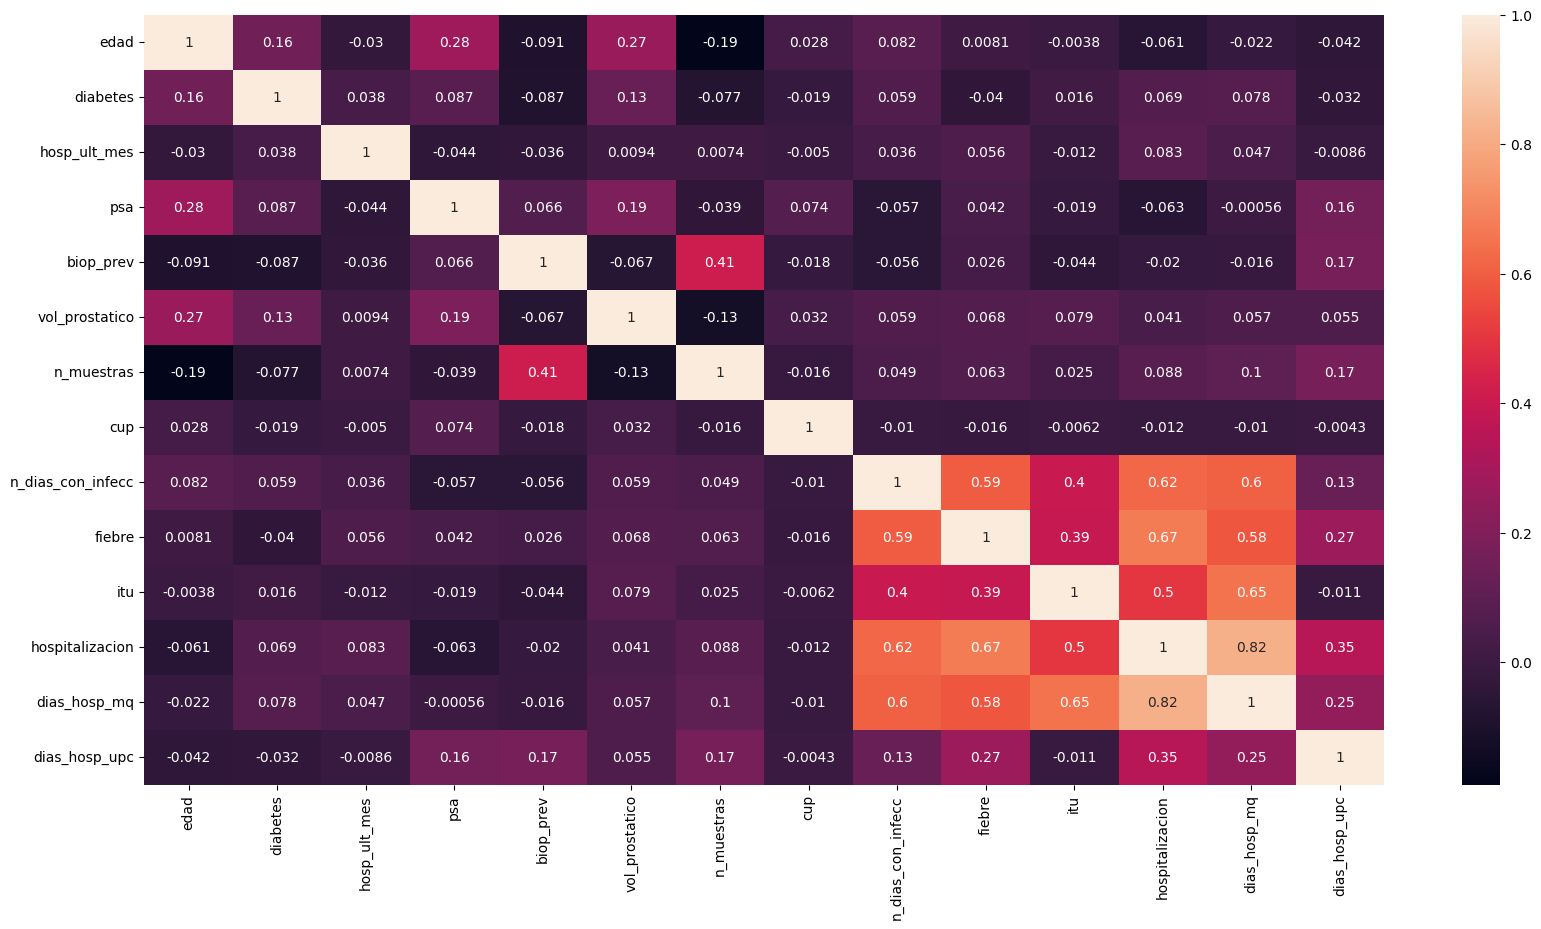

In [951]:
#grafico de las correlaciones
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [952]:
df_main.head()

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,NEG,1,1,0,NO,NO,NO,1,2,0
1,56,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,NEG,1,1,0,NO,NO,NO,1,5,0
2,57,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4,3
3,56,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,NEG,1,1,0,NO,NO,NO,1,5,0
4,55,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4,3


In [953]:
# Cambiamos los NO de dichas columnas, para poder identificarlas de mejor manera
df_main.loc[df_main['tipo_cultivo'] == 'NO', "tipo_cultivo"] = 'NO_tipo_cultivo'
df_main.loc[df_main['agente_aislado'] == 'NO', "agente_aislado"] = 'NO_agente_aislado'
df_main.loc[df_main['patron_resistencia'] == 'NO', "patron_resistencia"] = 'NO_patron_resistencia'
df_main.loc[df_main['antib_en_profilaxis'] == 'NO', "antib_en_profilaxis"] = 'NO_antib_profilax'
df_main.loc[df_main['biopsia'] == 'NO', "biopsia"] = 'NO_biopsia'

In [954]:
# Ajustamos los nombres de estos datos
df_main['patron_resistencia'] = df_main['patron_resistencia'].replace(' AMPI R, CIPRO R, GENTA R, SULFA M R', 'R AMPI, R GENTA, R SULFA')
df_main['patron_resistencia'] = df_main['patron_resistencia'].replace('RESISTENTE A AMPI, CIPRO Y GENTA', 'R AMPI, R CIPRO, R GENTA')
df_main['patron_resistencia'] = df_main['patron_resistencia'].replace('RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA', 
                                                                            'R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, R CIPRO, R CEFEPIME, R CEFOTAXIMA')

In [955]:
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,NEG,1,1,0,NO_tipo_cultivo,NO_agente_aislado,NO_patron_resistencia,1,2,0
1,56,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,NEG,1,1,0,NO_tipo_cultivo,NO_agente_aislado,NO_patron_resistencia,1,5,0
2,57,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4,3
3,56,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,NEG,1,1,0,NO_tipo_cultivo,NO_agente_aislado,NO_patron_resistencia,1,5,0
4,55,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO_patron_resistencia,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55,0,0,5.0,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,ADENOCARCINOMA GLEASON 7,0,0,0,NO_tipo_cultivo,NO_agente_aislado,NO_patron_resistencia,0,0,0
453,70,1,0,18.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,NEG,0,0,0,NO_tipo_cultivo,NO_agente_aislado,NO_patron_resistencia,0,0,0
455,67,0,0,6.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,ADENOCARCINOMA GLEASON 6,0,0,0,NO_tipo_cultivo,NO_agente_aislado,NO_patron_resistencia,0,0,0
456,64,0,0,4.8,0,1,OTROS,12,0,ADENOCARCINOMA GLEASON 7,0,0,0,NO_tipo_cultivo,NO_agente_aislado,NO_patron_resistencia,0,0,0


In [956]:
# Función para agregar variables ficticias para reemplazar variables categóricas
def dummies(x):
  dummy = pd.get_dummies(df_main[x]).astype(int)
  df_main.drop(columns = x , inplace = True)
  return pd.concat([df_main, dummy], axis = 1)

In [957]:
df_main = dummies('antib_en_profilaxis')
df_main = dummies('biopsia')
df_main = dummies('tipo_cultivo')
df_main = dummies('agente_aislado')
df_main = dummies('patron_resistencia')
df_main


,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,n_muestras,cup,n_dias_con_infecc,fiebre,itu,hospitalizacion,dias_hosp_mq,dias_hosp_upc,CEFALOSPORINA_AMINOGLUCOCIDO,FLUOROQUINOLONA_AMINOGLICOSIDO,OROQUINOLONAS,OTROS,ADENOCARCINOMA GLEASON 6,ADENOCARCINOMA GLEASON 7,ADENOCARCINOMA GLEASON 8,ADENOCARCINOMA GLEASON 9,CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,HIPERPLASIA PROSTATICA,NEG,PROSTATITIS,HEMOCULTIVO,HEMOCULTIVO Y UROCULTIVO,NO_tipo_cultivo,UROCULTIVO,E.COLI,NO_agente_aislado,PSEUDOMONAS AERUGINOSA,"AMPI R, CIPRO R, GENTA R, SULFA M R",MULTI SENSIBLE,NO_patron_resistencia,"R AMPI, R CIPRO, R GENTA","R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, R CIPRO, R CEFEPIME, R CEFOTAXIMA"
0,53,0,0,4.0,0,1,12,0,1,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
1,56,0,0,7.7,0,1,12,0,1,1,0,1,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
2,57,0,0,29.0,1,1,24,0,1,1,0,1,4,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
3,56,0,0,7.0,0,1,12,0,1,1,0,1,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,55,0,0,29.0,1,1,24,0,1,1,0,1,4,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55,0,0,5.0,0,0,12,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
453,70,1,0,18.0,0,1,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
455,67,0,0,6.0,0,1,12,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
456,64,0,0,4.8,0,1,12,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [958]:
df_main.to_csv('Datasets/BBDD_hospitalizacion_2.csv', index=False, encoding='utf-8')